In [127]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import datetime as dt
import matplotlib.pyplot as plt

In [128]:
#Overarching objective: view the average number of 2's vs 3's taken by big men (power forwards
#and centers) from 2000 to 2017

hoops_data = pd.read_excel("NBA+Data.xlsx", sheet_name ="NBA+Data")
hoops_data.head()




,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [129]:
#isolating only the years 2000-2017

hoops_data = hoops_data[hoops_data.Year >= 2000]
hoops_data.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0
14475,2000.0,Ray Allen,SG,24.0,MIL,82.0,82.0,3070.0,20.6,0.570,...,0.887,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0
14476,2000.0,Rafer Alston,PG,23.0,MIL,27.0,0.0,361.0,4.3,0.310,...,0.750,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0
14477,2000.0,John Amaechi,C,29.0,ORL,80.0,53.0,1684.0,13.2,0.505,...,0.766,62.0,204.0,266.0,95.0,35.0,37.0,139.0,161.0,836.0
14478,2000.0,Derek Anderson,SG,25.0,LAC,64.0,58.0,2201.0,16.9,0.542,...,0.877,80.0,178.0,258.0,220.0,90.0,11.0,167.0,149.0,1080.0
14479,2000.0,Kenny Anderson,PG,29.0,BOS,82.0,82.0,2593.0,17.4,0.524,...,0.775,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0


In [130]:
#finding all different ways big men are listed (anything w/ C or PF)
hoops_data['Pos'].unique()

array(['SG', 'SF', 'PG', 'C', 'PF', 'SF-SG', 'SF-PF', 'PF-SF', 'C-PF',
       'SG-PG', 'PG-SG', 'SG-SF', 'PF-C', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

In [131]:
#creating a variable for ever different position
c = hoops_data.loc[hoops_data['Pos'] == 'C']
pf = hoops_data.loc[hoops_data['Pos'] == 'PF']
c_pf = hoops_data.loc[hoops_data['Pos'] == 'C-PF']
pf_c = hoops_data.loc[hoops_data['Pos'] == 'PF-C']

In [132]:
#creating the mean 2 pt attempts for each position, including all of '00-'17
c_mean = c['2PA'].mean()
pf_mean = pf['2PA'].mean()
c_pf_mean = c_pf['2PA'].mean()
pf_c_mean = pf_c['2PA'].mean()

In [133]:
#creating a DF for the values to sit into
gross_mean_df = pd.DataFrame({'C':c_mean, "PF": pf_mean,
                             'C/PF': c_pf_mean, 'PF/C': pf_c_mean},
                             index = [0])
gross_mean_df

,C,PF,C/PF,PF/C
0,278.197052,318.230288,234.0,241.733333


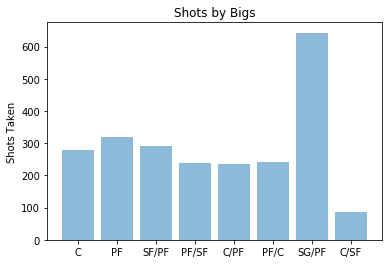

In [134]:
height = [278,318,292,238,234,241,643,87]
x = ('C', 'PF', 'SF/PF','PF/SF','C/PF','PF/C','SG/PF','C/SF')
x_pos = len(x)
width = .35

plt.bar(x, height, align = 'center', alpha = .5)
plt.xticks(x)
plt.ylabel("Shots Taken")
plt.title("Shots by Bigs")

plt.show()

In [135]:
# trying to isolate 2001 the same way I isolated '00-'17
hoops_data_2001 = hoops_data[hoops_data.Year == 2001]
hoops_data_2002 = hoops_data[hoops_data.Year == 2002]
hoops_data_2003 = hoops_data[hoops_data.Year == 2003]
hoops_data_2004 = hoops_data[hoops_data.Year == 2004]
hoops_data_2005 = hoops_data[hoops_data.Year == 2005]
hoops_data_2006 = hoops_data[hoops_data.Year == 2006]
hoops_data_2007 = hoops_data[hoops_data.Year == 2007]
hoops_data_2008 = hoops_data[hoops_data.Year == 2008]
hoops_data_2009 = hoops_data[hoops_data.Year == 2009]
hoops_data_2010 = hoops_data[hoops_data.Year == 2010]
hoops_data_2011 = hoops_data[hoops_data.Year == 2011]
hoops_data_2012 = hoops_data[hoops_data.Year == 2012]
hoops_data_2013 = hoops_data[hoops_data.Year == 2013]
hoops_data_2014 = hoops_data[hoops_data.Year == 2014]
hoops_data_2015 = hoops_data[hoops_data.Year == 2015]
hoops_data_2016 = hoops_data[hoops_data.Year == 2016]
hoops_data_2017 = hoops_data[hoops_data.Year == 2017]
hoops_data_2000 = hoops_data[hoops_data.Year == 2000]

In [136]:
# I should have done all of this for '00 first.  Will be at the end instead.
#creating a variable for big men in '01
c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C']
pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF']
c_pf_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'C-PF']
pf_c_01 = hoops_data_2001.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '01
c_mean_01 = c_01['2PA'].mean()
pf_mean_01 = pf_01['2PA'].mean()
c_pf_mean_01 = c_pf_01['2PA'].mean()
pf_c_mean_01 = pf_c_01['2PA'].mean()

In [137]:
#turning # of 2's (mean) in a DF
two_pters_taken_mean_01_df = pd.DataFrame({'C':c_mean_01, "PF": pf_mean_01, 
                             'C/PF': c_pf_mean_01, 'PF/C': pf_c_mean_01},
                             index = [0])

In [138]:
two_pt_att_mean_01 = (c_mean_01 + pf_mean_01 + c_pf_mean_01) / 3
two_pt_att_mean_01

393.37733605164794

In [139]:
#moving on to 2002
#creating a variable for big men in '02
c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C']
pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF']
c_pf_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'C-PF']
pf_c_02 = hoops_data_2002.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '02
c_mean_02 = c_02['2PA'].mean()
pf_mean_02 = pf_02['2PA'].mean()
c_pf_mean_02 = c_pf_02['2PA'].mean()
pf_c_mean_02 = pf_c_02['2PA'].mean()

In [140]:
two_pters_taken_mean_02_df = pd.DataFrame({'C':c_mean_02, "PF": pf_mean_02, 
                             'C/PF': c_pf_mean_02, 'PF/C': pf_c_mean_02},
                             index = [0])
two_pters_taken_mean_02_df

,C,PF,C/PF,PF/C
0,282.33945,377.595745,NaN,NaN


In [141]:
two_pt_att_mean_02 = (c_mean_02 + pf_mean_02) / 2
two_pt_att_mean_02

329.96759711106773

In [142]:
#moving on to 2003
#creating a variable for big men in '03
c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C']
pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF']
c_pf_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'C-PF']
pf_c_03 = hoops_data_2003.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_03 = c_03['2PA'].mean()
pf_mean_03 = pf_03['2PA'].mean()
c_pf_mean_03 = c_pf_03['2PA'].mean()
pf_c_mean_03 = pf_c_03['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_03_df = pd.DataFrame({'C':c_mean_03, "PF": pf_mean_03, 
                             'C/PF': c_pf_mean_03, 'PF/C': pf_c_mean_03},
                             index = [0])
two_pters_taken_mean_03_df

,C,PF,C/PF,PF/C
0,283.981308,374.164835,NaN,NaN


In [143]:
two_pt_att_mean_03 = (c_mean_03 + pf_mean_03 ) / 2
two_pt_att_mean_03

329.07307178802506

In [144]:
#moving on to 2004
#creating a variable for big men in '04
c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C']
pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF']
c_pf_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'C-PF']
pf_c_04 = hoops_data_2004.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_04 = c_04['2PA'].mean()
pf_mean_04 = pf_04['2PA'].mean()
c_pf_mean_04 = c_pf_04['2PA'].mean()
pf_c_mean_04 = pf_c_04['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_04_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_04, 
                             'C/PF': c_pf_mean_04, 'PF/C': pf_c_mean_04},
                             index = [0])
two_pters_taken_mean_04_df

,C,PF,C/PF,PF/C
0,232.125984,337.984252,129.4,174.5


In [145]:
two_pt_att_mean_04 = (c_mean_04 + pf_mean_04 + 
                      c_pf_mean_04 + pf_c_mean_04) / 4
two_pt_att_mean_04

218.5025590551181

In [146]:
#2005
#creating a variable for big men in '05
c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C']
pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF']
c_pf_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'C-PF']
pf_c_05 = hoops_data_2005.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '03
c_mean_05 = c_05['2PA'].mean()
pf_mean_05 = pf_05['2PA'].mean()
c_pf_mean_05 = c_pf_05['2PA'].mean()
pf_c_mean_05 = pf_c_05['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_05_df = pd.DataFrame({'C':c_mean_05, "PF": pf_mean_05, 
                             'C/PF': c_pf_mean_05, 'PF/C': pf_c_mean_05},
                             index = [0])
two_pters_taken_mean_05_df

,C,PF,C/PF,PF/C
0,244.239669,346.008264,191.8,239.0


In [147]:
two_pt_att_mean_05 = (c_mean_05 + pf_mean_05 + 
                     + c_pf_mean_05 + pf_c_mean_05) / 4
two_pt_att_mean_05

255.26198347107436

In [148]:
#2006
#creating a variable for big men in '06
c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C']
pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF']
c_pf_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'C-PF']
pf_c_06 = hoops_data_2006.loc[hoops_data['Pos'] == 'PF-C']

#creating the mean of 2 pt attempts for bigs in '03
c_mean_06 = c_06['2PA'].mean()
pf_mean_06 = pf_06['2PA'].mean()
c_pf_mean_06 = c_pf_06['2PA'].mean()
pf_c_mean_06 = pf_c_06['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_06_df = pd.DataFrame({'C':c_mean_06, "PF": pf_mean_06, 
                             'C/PF': c_pf_mean_06, 'PF/C': pf_c_mean_06},
                             index = [0])
two_pters_taken_mean_06_df

,C,PF,C/PF,PF/C
0,226.113821,360.557692,276.0,174.5


In [149]:
two_pt_att_mean_06 = (c_mean_06 + pf_mean_06
                     + c_pf_mean_06 + pf_c_mean_06) / 4
two_pt_att_mean_06

259.2928783614759

In [150]:
#2007
#creating a variable for big men in '07
c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C']
pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF']
c_pf_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'C-PF']
pf_c_07 = hoops_data_2007.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_07 = c_07['2PA'].mean()
pf_mean_07 = pf_07['2PA'].mean()
c_pf_mean_07 = c_pf_07['2PA'].mean()
pf_c_mean_07 = pf_c_07['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_07_df = pd.DataFrame({'C':c_mean_07, "PF": pf_mean_07, 
                             'C/PF': c_pf_mean_07, 'PF/C': pf_c_mean_07},
                             index = [0])
two_pters_taken_mean_07_df

,C,PF,C/PF,PF/C
0,315.381443,285.460317,NaN,80.0


In [151]:
two_pt_att_mean_07 = (c_mean_07 + pf_mean_07 + pf_c_mean_07) / 3
two_pt_att_mean_07

226.94725358642884

In [152]:
#2008
#creating a variable for big men in '08
c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C']
pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF']
c_pf_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'C-PF']
pf_c_08 = hoops_data_2008.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_08 = c_08['2PA'].mean()
pf_mean_08 = pf_08['2PA'].mean()
c_pf_mean_08 = c_pf_08['2PA'].mean()
pf_c_mean_08 = pf_c_08['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_08_df = pd.DataFrame({'C':c_mean_08, "PF": pf_mean_08, 
                             'C/PF': c_pf_mean_08, 'PF/C': pf_c_mean_08},
                             index = [0])
two_pters_taken_mean_08_df

,C,PF,C/PF,PF/C
0,278.15748,285.752,275.666667,NaN


In [153]:
two_pt_att_mean_08 = (c_mean_08 + pf_mean_08
                     +c_pf_mean_08) / 3
two_pt_att_mean_08

279.85871566054243

In [154]:
#2009
#creating a variable for big men in '09
c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C']
pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF']
c_pf_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'C-PF']
pf_c_09 = hoops_data_2009.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_09 = c_09['2PA'].mean()
pf_mean_09 = pf_09['2PA'].mean()
c_pf_mean_09 = c_pf_09['2PA'].mean()
pf_c_mean_09 = pf_c_09['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_09_df = pd.DataFrame({'C':c_mean_09, "PF": pf_mean_09, 
                             'C/PF': c_pf_mean_09, 'PF/C': pf_c_mean_09},
                             index = [0])
two_pters_taken_mean_09_df

,C,PF,C/PF,PF/C
0,277.460317,291.798319,NaN,491.0


In [155]:
two_pt_att_mean_09 = (c_mean_09 + pf_mean_09 + 
                      pf_c_mean_09) / 3
two_pt_att_mean_09

353.4195455960162

In [156]:
#Note to self: Starting in 2010 I'm excluding C/SF & SG/PF from being 'Bigs'
#2010
#creating a variable for big men in '10
c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C']
pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF']
c_pf_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'C-PF']
pf_c_10 = hoops_data_2010.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_10 = c_10['2PA'].mean()
pf_mean_10 = pf_10['2PA'].mean()
c_pf_mean_10 = c_pf_10['2PA'].mean()
pf_c_mean_10 = pf_c_10['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_10_df = pd.DataFrame({'C':c_mean_10, "PF": pf_mean_10, 
                             'C/PF': c_pf_mean_10, 'PF/C': pf_c_mean_10},
                             index = [0])
two_pters_taken_mean_10_df

,C,PF,C/PF,PF/C
0,300.28972,336.589744,594.0,329.666667


In [157]:
two_pt_att_mean_10 = (c_mean_10 + pf_mean_10 + c_pf_mean_10
                     + pf_c_mean_10) / 4
two_pt_att_mean_10

390.1365324706446

In [158]:
#2011
#creating a variable for big men in '11
c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C']
pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF']
c_pf_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'C-PF']
pf_c_11 = hoops_data_2011.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_11 = c_11['2PA'].mean()
pf_mean_11 = pf_11['2PA'].mean()
c_pf_mean_11 = c_pf_11['2PA'].mean()
pf_c_mean_11 = pf_c_11['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_11_df = pd.DataFrame({'C':c_mean_11, "PF": pf_mean_11, 
                             'C/PF': c_pf_mean_11, 'PF/C': pf_c_mean_11},
                             index = [0])
two_pters_taken_mean_11_df

,C,PF,C/PF,PF/C
0,258.268657,329.324324,180.5,NaN


In [159]:
two_pt_att_mean_11 = (c_mean_11 + pf_mean_11
                      +c_pf_mean_11) / 3
two_pt_att_mean_11

256.0309936802474

In [160]:
#2012
#creating a variable for big men in '12
c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C']
pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF']
c_pf_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'C-PF']
pf_c_12 = hoops_data_2012.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_12 = c_12['2PA'].mean()
pf_mean_12 = pf_12['2PA'].mean()
c_pf_mean_12 = c_pf_12['2PA'].mean()
pf_c_mean_12 = pf_c_12['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_12_df = pd.DataFrame({'C':c_mean_12, "PF": pf_mean_12, 
                             'C/PF': c_pf_mean_12, 'PF/C': pf_c_mean_12},
                             index = [0])
two_pters_taken_mean_12_df

,C,PF,C/PF,PF/C
0,204.165289,297.084906,61.0,NaN


In [161]:
two_pt_att_mean_12 = (c_mean_12 + pf_mean_12
                     + c_pf_mean_12) / 3
two_pt_att_mean_12

187.41673163885855

In [162]:
#2013
#creating a variable for big men in '13
c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C']
pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF']
c_pf_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'C-PF']
pf_c_13 = hoops_data_2013.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_13 = c_13['2PA'].mean()
pf_mean_13 = pf_13['2PA'].mean()
c_pf_mean_13 = c_pf_13['2PA'].mean()
pf_c_mean_13 = pf_c_13['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_13_df = pd.DataFrame({'C':c_mean_13, "PF": pf_mean_13, 
                             'C/PF': c_pf_mean_13, 'PF/C': pf_c_mean_13},
                             index = [0])
two_pters_taken_mean_13_df

,C,PF,C/PF,PF/C
0,298.901786,338.8,482.0,49.0


In [163]:
two_pt_att_mean_13 = (c_mean_13 + pf_mean_13 
                      + c_pf_mean_13 + pf_c_mean_13) / 4
two_pt_att_mean_13

292.17544642857143

In [164]:
#2014
#creating a variable for big men in '14
c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C']
pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF']
c_pf_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'C-PF']
pf_c_14 = hoops_data_2014.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_14 = c_14['2PA'].mean()
pf_mean_14 = pf_14['2PA'].mean()
c_pf_mean_14 = c_pf_14['2PA'].mean()
pf_c_mean_14 = pf_c_14['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_14_df = pd.DataFrame({'C':c_mean_14, "PF": pf_mean_14, 
                             'C/PF': c_pf_mean_14, 'PF/C': pf_c_mean_14},
                             index = [0])
two_pters_taken_mean_14_df

,C,PF,C/PF,PF/C
0,270.567568,337.9,NaN,NaN


In [165]:
two_pt_att_mean_14 = (c_mean_14 + pf_mean_14) / 2
two_pt_att_mean_14

304.2337837837838

In [166]:
#2015
#creating a variable for big men in '15
c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C']
pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF']
c_pf_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'C-PF']
pf_c_15 = hoops_data_2015.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_15 = c_15['2PA'].mean()
pf_mean_15 = pf_15['2PA'].mean()
c_pf_mean_15 = c_pf_15['2PA'].mean()
pf_c_mean_15 = pf_c_15['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_15_df = pd.DataFrame({'C':c_mean_15, "PF": pf_mean_15, 
                             'C/PF': c_pf_mean_15, 'PF/C': pf_c_mean_15},
                             index = [0])
two_pters_taken_mean_15_df

,C,PF,C/PF,PF/C
0,336.3,272.356643,NaN,NaN


In [167]:
two_pt_att_mean_15 = (c_mean_15 + pf_mean_15) / 2
two_pt_att_mean_15

304.3283216783217

In [168]:
#2016
#creating a variable for big men in '16
c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C']
pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF']
c_pf_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'C-PF']
pf_c_16 = hoops_data_2016.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '07
c_mean_16 = c_16['2PA'].mean()
pf_mean_16 = pf_16['2PA'].mean()
c_pf_mean_16 = c_pf_16['2PA'].mean()
pf_c_mean_16 = pf_c_16['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_16_df = pd.DataFrame({'C':c_mean_16, "PF": pf_mean_16, 
                             'C/PF': c_pf_mean_16, 'PF/C': pf_c_mean_16},
                             index = [0])
two_pters_taken_mean_16_df

,C,PF,C/PF,PF/C
0,316.048077,266.756303,NaN,112.0


In [169]:
two_pt_att_mean_16 = (c_mean_16 + pf_mean_16 + pf_c_mean_16) / 3
two_pt_att_mean_16

231.6014598146951

In [170]:
#2017
#creating a variable for big men in '17
c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C']
pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF']
c_pf_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'C-PF']
pf_c_17 = hoops_data_2017.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '17
c_mean_17 = c_17['2PA'].mean()
pf_mean_17 = pf_17['2PA'].mean()
c_pf_mean_17 = c_pf_17['2PA'].mean()
pf_c_mean_17 = pf_c_17['2PA'].mean()


#making a DF to find the NaN values
two_pters_taken_mean_17_df = pd.DataFrame({'C':c_mean_17, "PF": pf_mean_17, 
                             'C/PF': c_pf_mean_17, 'PF/C': pf_c_mean_17},
                             index = [0])
two_pters_taken_mean_17_df

,C,PF,C/PF,PF/C
0,311.256637,241.495798,NaN,238.0


In [171]:
two_pt_att_mean_17 = (c_mean_17 + pf_mean_17 + pf_c_mean_17) / 3
two_pt_att_mean_17

263.58414516248973

In [172]:
#Coming back to 2000
#creating a variable for big men in '00
c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C']
pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF']
c_pf_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'C-PF']
pf_c_00 = hoops_data_2000.loc[hoops_data['Pos'] == 'PF-C']


#creating the mean of 2 pt attempts for bigs in '00
c_mean_00 = c_00['2PA'].mean()
pf_mean_00 = pf_00['2PA'].mean()
c_pf_mean_00 = c_pf_00['2PA'].mean()
pf_c_mean_00 = pf_c_00['2PA'].mean()

#making a DF to find the NaN values
two_pters_taken_mean_00_df = pd.DataFrame({'C':c_mean_04, "PF": pf_mean_00, 
                             'C/PF': c_pf_mean_00, 'PF/C': pf_c_mean_00},
                             index = [0])
two_pters_taken_mean_00_df

,C,PF,C/PF,PF/C
0,232.125984,332.869565,NaN,NaN


In [173]:
two_pt_att_mean_00 = (c_mean_00 + pf_mean_00) / 2
two_pt_att_mean_00

338.9750124937531

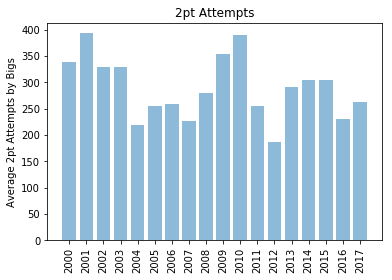

In [174]:
#Creating the bar plot to show 2pt attempts over the years
height_in_order = [338.9750124937531,393.37733605164794,329.96759711106773,
                  329.07307178802506,218.5025590551181,255.26198347107436,
                  259.2928783614759,226.94725358642884,279.85871566054243,
                  353.4195455960162,390.1365324706446,256.0309936802474,
                  187.41673163885855,292.17544642857143,304.2337837837838,
                  304.3283216783217,231.6014598146951,263.58414516248973]
years = ('2000','2001','2002','2003','2004','2005','2006','2007','2008',
         '2009','2010','2011','2012',
        '2013','2014','2015','2016','2017')

width = .5

plt.bar(years, height_in_order, alpha = .5)
plt.xticks(years, rotation = 'vertical')
plt.ylabel("Average 2pt Attempts by Bigs")
plt.title("2pt Attempts")

plt.show()

In [175]:
# For the next few cells I am stealing code from Ovais to incorporate
 #his for loop to isoloate years and positions

In [176]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA_Data_2000.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [177]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
3,2000,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
4,2000,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0


In [178]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [179]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,12.0,420.0,5.8,0.438,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,SG,27.0,TOT,24.0,12.0,441.0,9.8,0.418,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [189]:
#remove 'unnamed' and position columns

complete_df = merged_df.drop(["Pos"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,0.041,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,25.0,DEN,15.0,10.0,373.0,10.8,0.448,0.015,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,26.0,DEN,29.0,12.0,420.0,5.8,0.438,0.090,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,27.0,TOT,24.0,12.0,441.0,9.8,0.418,0.014,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [190]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 1990
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Chris Gatling,32.0,TOT,85.0,0.0,1811.0,17.3,0.525,0.087,...,71.0,82.0,23.0,169.0,246.0,1014.0,F-C,220,82,6ft 10in
2,2000,Chris Gatling,32.0,ORL,45.0,0.0,1041.0,17.4,0.525,0.050,...,40.0,48.0,10.0,105.0,142.0,598.0,F-C,220,82,6ft 10in
3,2000,Chris Gatling,32.0,DEN,40.0,0.0,770.0,17.1,0.525,0.138,...,31.0,34.0,13.0,64.0,104.0,416.0,F-C,220,82,6ft 10in
4,2000,Matt Geiger,30.0,PHI,65.0,20.0,1406.0,13.9,0.483,0.007,...,39.0,29.0,22.0,91.0,194.0,629.0,C,243,85,7ft 1in


In [226]:
#if statement grouping all big men into a new column called 'Big Men'
#groupby 'big men' and then grab only values for each year you need
# create a dataframe that only grabs the column 'big men'

#desired_years_df["bm"] = desired_years_df.eval("position == 'C' or 'position' == 'F' or position == 'F-C' or positon == 'C-F'") # , 
#                                                inplace = True)


def f(row):
    if row ['position'] == 'C' or row ['position'] == 'F' or row ['position'] == 'C-F' or row ['position'] == 'F-C':
        val = 'bm'
    else: 
        val = 'sm' 
    return val

desired_years_df['bm'] = desired_years_df.apply(f, axis = 1)

#print(desired_years_df[['position','bm']])
type(desired_years_df)
desired_years_df.columns

Index(['Year', 'name', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'position', 'weight', 'height (inches)',
       'height(feet)', 'bm'],
      dtype='object')

In [227]:
sm_df = desired_years_df.groupby(['Year','bm'])
#sm_df.head()
type(sm_df)

sm_df.groups
sm_df.MP.mean()

Year  bm
2000  bm    1073.917293
      sm    1265.347032
2001  bm    1065.017123
      sm    1232.327511
2002  bm    1144.641221
      sm    1226.703540
2003  bm    1174.035019
      sm    1275.188940
2004  bm    1010.583072
      sm    1220.073643
2005  bm    1050.369775
      sm    1207.785714
2006  bm    1050.516556
      sm    1225.615385
2007  bm    1116.920000
      sm    1312.465021
2008  bm     995.906542
      sm    1172.903915
2009  bm    1040.137821
      sm    1217.397059
2010  bm    1088.367213
      sm    1186.238095
2011  bm    1008.203488
      sm    1201.673684
2012  bm     850.145215
      sm     988.583658
2013  bm    1051.563333
      sm    1172.706093
2014  bm    1001.163009
      sm    1139.697987
2015  bm    1007.052147
      sm    1055.875740
2016  bm    1054.437722
      sm    1147.561056
2017  bm    1075.678082
      sm    1107.417476
Name: MP, dtype: float64

In [240]:

y = sm_df.MP.mean()
sample = y.reset_index()

sample.head()
#plt.bar(sample['Year'], sample.MP)

sample_bm = sample.loc[sample["bm"]=="bm"]

In [241]:
sample_bm

,Year,bm,MP
0,2000,bm,1073.917293
2,2001,bm,1065.017123
4,2002,bm,1144.641221
6,2003,bm,1174.035019
8,2004,bm,1010.583072
10,2005,bm,1050.369775
12,2006,bm,1050.516556
14,2007,bm,1116.920000
16,2008,bm,995.906542
18,2009,bm,1040.137821


In [229]:
x = sm_df('Year')
print(x)

TypeError: 'DataFrameGroupBy' object is not callable

In [192]:
desired_years_df.columns

Index(['Year', 'name', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'position', 'weight', 'height (inches)',
       'height(feet)'],
      dtype='object')

In [115]:


two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

center = two_thousand.loc[two_thousand["position"]== "C"]
for_cent = two_thousand.loc[two_thousand["position"]== "F-C"]
cent_for = two_thousand.loc[two_thousand['position']== 'C-F']
forward = two_thousand.loc[two_thousand["position"]== "F"]

In [118]:
#for i in range (1,18):
    

two_thousand_one = desired_years_df.loc[desired_years_df["Year"]==2001]
center_1 = two_thousand_one.loc[two_thousand_one["position"]== "C"]
for_cent_i = two_thousand_one.loc[two_thousand_one["position"]== "F-C"]
cent_for_i = two_thousand_one.loc[two_thousand_one['position']== 'C-F']
forward_i = two_thousand_one.loc[two_thousand_one["position"]== "F"]

In [117]:
two_thousand_two = desired_years_df.loc[desired_years_df["Year"]==2002]
center_2 = two_thousand_two.loc[two_thousand_two["position"]== "C"]
for_cent_2 = two_thousand_two.loc[two_thousand_two["position"]== "F-C"]
forward_2 = two_thousand_two.loc[two_thousand_two["position"]== "F"]

In [19]:
two_thousand_three = desired_years_df.loc[desired_years_df["Year"]==2003]
center_3 = two_thousand_three.loc[two_thousand_three["position"]== "C"]
for_cent_3 = two_thousand_three.loc[two_thousand_three["position"]== "F-C"]
forward_3 = two_thousand_three.loc[two_thousand_three["position"]== "F"]

In [20]:
two_thousand_four = desired_years_df.loc[desired_years_df["Year"]==2004]
center_4 = two_thousand_four.loc[two_thousand_four["position"]== "C"]
for_cent_4 = two_thousand_four.loc[two_thousand_four["position"]== "F-C"]
forward_4 = two_thousand_four.loc[two_thousand_four["position"]== "F"]

In [21]:
two_thousand_five = desired_years_df.loc[desired_years_df["Year"]==2005]
center_5 = two_thousand_five.loc[two_thousand_five["position"]== "C"]
for_cent_5 = two_thousand_five.loc[two_thousand_five["position"]== "F-C"]
forward_5 = two_thousand_five.loc[two_thousand_five["position"]== "F"]

In [22]:
two_thousand_six = desired_years_df.loc[desired_years_df["Year"]==2006]
center_6 = two_thousand_six.loc[two_thousand_six["position"]== "C"]
for_cent_6 = two_thousand_six.loc[two_thousand_six["position"]== "F-C"]
forward_6 = two_thousand_six.loc[two_thousand_six["position"]== "F"]

In [23]:
two_thousand_seven = desired_years_df.loc[desired_years_df["Year"]==2007]
center_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "C"]
for_cent_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F-C"]
forward_7 = two_thousand_seven.loc[two_thousand_seven["position"]== "F"]

In [24]:
two_thousand_eight = desired_years_df.loc[desired_years_df["Year"]==2008]
center_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "C"]
for_cent_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F-C"]
forward_8 = two_thousand_eight.loc[two_thousand_eight["position"]== "F"]

In [25]:
two_thousand_nine = desired_years_df.loc[desired_years_df["Year"]==2009]
center_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "C"]
for_cent_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F-C"]
forward_9 = two_thousand_nine.loc[two_thousand_nine["position"]== "F"]

In [26]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]
center_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "C"]
for_cent_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F-C"]
forward_10 = two_thousand_ten.loc[two_thousand_ten["position"]== "F"]

In [27]:
two_thousand_eleven = desired_years_df.loc[desired_years_df["Year"]==2011]
center_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "C"]
for_cent_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F-C"]
forward_11 = two_thousand_eleven.loc[two_thousand_eleven["position"]== "F"]

In [28]:
two_thousand_twelve = desired_years_df.loc[desired_years_df["Year"]==2012]
center_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "C"]
for_cent_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F-C"]
forward_12 = two_thousand_twelve.loc[two_thousand_twelve["position"]== "F"]

In [29]:
two_thousand_thirteen = desired_years_df.loc[desired_years_df["Year"]==2013]
center_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "C"]
for_cent_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F-C"]
forward_13 = two_thousand_thirteen.loc[two_thousand_thirteen["position"]== "F"]

In [30]:
two_thousand_fourteen = desired_years_df.loc[desired_years_df["Year"]==2014]
center_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "C"]
for_cent_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F-C"]
forward_14 = two_thousand_fourteen.loc[two_thousand_fourteen["position"]== "F"]

In [31]:
two_thousand_fifteen = desired_years_df.loc[desired_years_df["Year"]==2015]
center_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "C"]
for_cent_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F-C"]
forward_15 = two_thousand_fifteen.loc[two_thousand_fifteen["position"]== "F"]

In [32]:
two_thousand_sixteen = desired_years_df.loc[desired_years_df["Year"]==2016]
center_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "C"]
for_cent_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F-C"]
forward_16 = two_thousand_sixteen.loc[two_thousand_sixteen["position"]== "F"]

In [33]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]
center_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "C"]
for_cent_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F-C"]
forward_17 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F"]

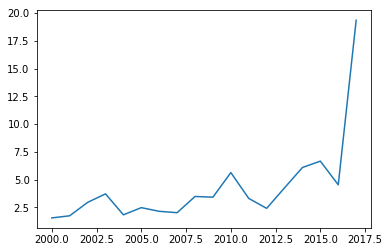

In [87]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_pt_att = [center["3PA"].mean(),center_1["3PA"].mean(),center_2["3PA"].mean(), 
                  center_3["3PA"].mean(), center_4["3PA"].mean(), center_5["3PA"].mean(), 
                  center_6["3PA"].mean(), center_7["3PA"].mean(), center_8["3PA"].mean(),
                  center_9["3PA"].mean(), center_10["3PA"].mean(), center_11["3PA"].mean(), 
                  center_12["3PA"].mean(), center_13["3PA"].mean(),center_14["3PA"].mean(),
                  center_15["3PA"].mean(),center_16["3PA"].mean(),center_17["3PA"].mean()]
#plt.savefig("Logan_Images/3PA Plot.png")
plt.plot(x,y_three_pt_att, label = '3 Pt Attempts')

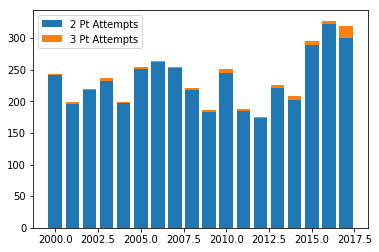

In [98]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_two_pt_att = [center["2PA"].mean(),center_1["2PA"].mean(),center_2["2PA"].mean(), center_3["2PA"].mean(), center_4["2PA"].mean(), 
center_5["2PA"].mean(), center_6["2PA"].mean(), center_7["2PA"].mean(), center_8["2PA"].mean(), center_9["2PA"].mean(),
center_10["2PA"].mean(), center_11["2PA"].mean(), center_12["2PA"].mean(), center_13["2PA"].mean(), center_14["2PA"].mean(),
center_15["2PA"].mean(),center_16["2PA"].mean(),center_17["2PA"].mean()]
#plt.savefig("Logan_Images/3PA Plot.png")

#labels = ['2 Pt Attempts', '3 Pt Attempts']

plt.bar(x, y_two_pt_att, label = '2 Pt Attempts')
plt.bar(x, y_three_pt_att, label = '3 Pt Attempts', bottom = y_two_pt_att)


#for y_arr, label in zip(y, labels):
 #   plt.plot((x,y_two_pt_att)
  #       (x,y_three_pt_att))
plt.legend()


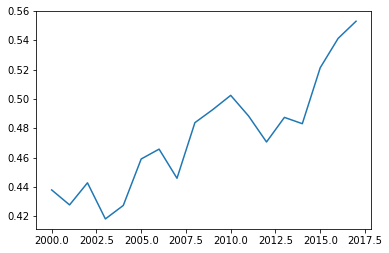

In [104]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_two_pt_percent = [center["2P%"].mean(), center_1["2P%"].mean(), center_2["2P%"].mean(), center_3["2P%"].mean(), 
                center_4["2P%"].mean(), center_5["2P%"].mean(), center_6["2P%"].mean(), center_7["2P%"].mean(), 
                center_8["2P%"].mean(), center_9["2P%"].mean(), center_10["2P%"].mean(), center_11["2P%"].mean(), 
                center_12["2P%"].mean(), center_13["2P%"].mean(), center_14["2P%"].mean(), center_15["2P%"].mean(),
                center_16["2P%"].mean(), center_17["2P%"].mean()]

plt.plot(x, y_two_pt_percent, label = '2 Pt Percentage')

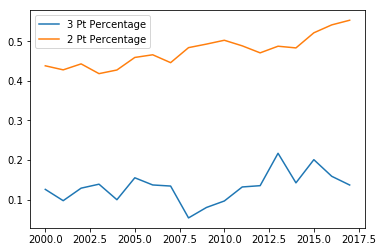

In [103]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_pt_percent = [center["3P%"].mean(),center_1["3P%"].mean(),center_2["3P%"].mean(), 
                  center_3["3P%"].mean(), center_4["3P%"].mean(), center_5["3P%"].mean(), 
                  center_6["3P%"].mean(), center_7["3P%"].mean(), center_8["3P%"].mean(),
                  center_9["3P%"].mean(), center_10["3P%"].mean(), center_11["3P%"].mean(), 
                  center_12["3P%"].mean(), center_13["3P%"].mean(),center_14["3P%"].mean(),
                  center_15["3P%"].mean(),center_16["3P%"].mean(),center_17["3P%"].mean()]

plt.plot(x, y_three_pt_percent, label = '3 Pt Percentage')
plt.plot(x, y_two_pt_percent, label = '2 Pt Percentage')

plt.legend()
plt.show()

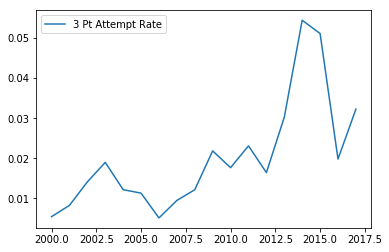

In [107]:
x= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
y_three_par = [center["3PAr"].mean(),center_1["3PAr"].mean(),center_2["3PAr"].mean(), center_3["3PAr"].mean(), center_4["3PAr"].mean(), 
center_5["3PAr"].mean(), center_6["3PAr"].mean(), center_7["3PAr"].mean(), center_8["3PAr"].mean(), center_9["3PAr"].mean(),
center_10["3PAr"].mean(), center_11["3PAr"].mean(), center_12["3PAr"].mean(), center_13["3PAr"].mean(), center_14["3PAr"].mean(),
center_15["3PAr"].mean(),center_16["3PAr"].mean(),center_17["3PAr"].mean()]

plt.plot(x, y_three_par, label = '3 Pt Attempt Rate')

plt.legend()
plt.show()

In [ ]:
combo = 
combo_08 = 
combo_17 = 

In [105]:
#set multi-index by year and name: year_name_df
#year_pos_df = complete_df.set_index(['Year',('Pos')])
year_pos_df = complete_df.set_index(['Year',('name')])
year_pos_df = year_pos_df.sort_index('name')('Dirk Nowitzki')
year_pos_df

ValueError: No axis named name for object type <class 'pandas.core.frame.DataFrame'>

In [88]:
#Create a DataFrame only containing big men
big_men_df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(1), ['C', 'C-PF', 'PF', 'PF-C'])]
big_men_df_2000 = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [2000])]
big_men_df_2001 = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [2001])]
#print(big_men_df_2000.head())

#Get the average 3PA for the year 2000
avg_threes_att_00 = big_men_df.loc[:]["3PA"].mean()
avg_threes_att_01 = big_men_df_2001.loc[:]['3PA'].mean()
avg_threes_att_01

63.593090211132434

In [115]:
# Stealing Ovais' for loop

#Make a years list
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

#positions desired
positions = ['C','C-PF', 'PF', 'PF-C']

#Create some lists to append to


for year in years:
    #Create a DataFrame with index_level zero equal to the value of year
    df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(0), [year])]
    for position in positions:
        #Create a DataFrame with index_level one equal to the value of position
        df = year_pos_df[np.in1d(year_pos_df.index.get_level_values(1), [position])]
        
        #Get stats
        threes = df.loc[:]["3PA"].mean()            
        print(f"{threes} for this {position}.")


10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404 for this PF.
30.533333333333335 for this PF-C.
10.013052208835342 for this C.
10.863636363636363 for this C-PF.
50.992311388755404